<a href="https://colab.research.google.com/github/mrklees/CausalAgent/blob/master/Essential%20Notation%20and%20Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Bare Essentials

Notes from *Causality: Models, Reasoning and Inference*

Pearl opens up with the essential background needed for the topic.  It is a good sign that it is very sparse, really only requiring a handle of discrete probability and a few of its signature results. Part of our goal as we go through the book is to be able to follow the proofs, so we will collect all of the theorems that are likely to show up in important arguments. 

Equation numbering is kept consistent with the text.




## Probability

We will adhere to a Bayesian view of probability in which probabilities express degree of belief that an event will occur and data is used as evidence to strengthen or modify those beliefs. 

| Probability Notation | Description |
| -------------------------------- | ------------------ |
| $P(X)$ | Probability of X |
| $P(X | Y)$ | Conditional probability of X Given Y |
| $P(X , Y)$ | Probability of X and Y occuring. We will also notate this as $X \vee Y$. |
| $ X \wedge Y $ | The Probability of X or Y occuring |
| $ \neg X $ | The Probability of X not happening | 


### Axioms of Probability

--------------------------------------------------------------------------------
$(1.1)$           <img width=50/> $0 <= P(A) <= 1 $

$(1.2)$          <img width=50/> $P(\text{Sure Proposition}) = 1$

$(1.3)$          <img width=50/> $P(A \text{ or } B) = P(A) + P(B) \text{ if A and B are mutually exclusive}$

$(1.4)$          <img width=50/> Any event $A$ can be given by $ P(A) = P(A, B) + P(A, \neg B) $


**(1.4)** is called the **law of total probability** and can be generalized to $B_i, i = 1, 2, ..., n$, a set of exhaustive and mutually exclusive propositions, by using the sum: $$ P(A) = \sum_i P(A, B_i) $$

### Conditional Probability

We can define joint probabilities $P(A, B)$ in terms of conditional probabilities because it is more aligned to how humans think about the world.  In this case you can think of $B$ as a piece of contextual knowledge and A as the event. The joint probability is given by: 

<img width=10/> $(1.9)$          <img width=100/> $P(A, B) = P(A | B) P(B)$

Notice how we can pass this definition of joint probability into the law of total probability to arrive an interesting result:

<img width=10/>$(1.10)$          <img width=100/>$ P(A) = \sum_i P(A|B_i)P(B_i) $

This equation says that the probability of A is a weighted sum over the beliefs in all the distinct ways that A might be realized.  The equation can be generalized:

<img width=10/>$(1.11)$          <img width=100/>$ P(A | K) = \sum_i P(A |B_i, K)P(B_i | K) $

#### The Chain Rule

There is one final useful generalization for calculating any joint probability called the chain rule.  It turns out to be super useful in evaluating Bayesian Networks, so pay attention.  Given some set of random variables (like maybe nodes in a Bayesina network...), $X_1, X_2, ..., X_n$. The probability of the joint event can be given as a product of $n$ conditional probabilities:

<img width=10/>$(1.11)$          <img width=100/>$ P(X_1, X_2, ..., X_n) = P(X_n | X_n-1, ...,  X_2, X_1) \cdots P(X_2
| X_1)P(X_1) $

Keen observers will note that the order of the variables seems to be arbitrary, and to a certain extent it is.  In the context of a Bayesian Network it's important that each conditional probability on the right is valid.  We'll see later that in the case of Directed Acyclic Graphs, it is always possible to provide such a valid ordering where nodes are only conditional on nodes for which they are actually conditional on. 

### Bayes Theorem

And finally we come to the seminal result for Bayesians, Bayes  Theorem. We'll often frame it in terms of a hypothesis $H$ and some evidence $E$, with the goal of updating our beliefs about $H$ given $E$, e.g. $P(H | e)$. 

<img width=10/>$(1.13)$          <img width=100/>$ P(H | E) = \frac{P(E | H)P(H)}{P(E)}$

We will also sometimes prefer to work with a version of Bayes Theorem defined in terms of odds and a likelihood ratio.  It's derived by considering:

<img width=10/>$(1.15)$          <img width=100/>$ \frac{P(H | E)}{P(H | \neg E)} $

and defining **prior odds** as:

<img width=10/>$(1.16)$          <img width=100/>$O(H) = \frac{P(H)}{1-P(H)}$

**likelihood ratio** as:

<img width=10/>$(1.17)$          <img width=100/>$L(E | H) = \frac{P(E|H)}{P(E|\neg H)}$

**posterior odds** as:

<img width=10/>$(1.18)$          <img width=100/>$O(H|E) = \frac{P(H|E)}{P(\neg H |E)}$

So that **Bayes Theorem** can now be given equivalently as:

<img width=10/>$(1.18)$          <img width=100/>$O(H|E)=L(E|H)O(H)$

This formulation is tied a little more closely to our intuition.  It states that our belief in a hypothesis $H$ given some knowledge $K$ and observed evidence $E$ should be the product of the prior odds $O(H)$, which represents the predictive support to H given background knowledge alone, and the likelihood ratio $L(E|H)$, which represents the diagnostic support given to H by the observed evidence. 

We can calculate $P(A)$ from $O(A)$ with:

<img width=10/>$(1.18)$          <img width=100/>$P(A) = \frac{O(A)}{1+O(A)}$

### Expectation and Variance

The **mean** or **expected value** of $X$ is given by:

<img width=10/>$(1.21)$          <img width=100/>$E(X) \triangleq \sum_x xP(x)$

The **conditional mean** of $X$ given $Y = y$ is:

<img width=10/>$(1.22)$          <img width=100/>$E(X) \traigleq \sum_x xP(x | y)

The **expectation of any function** $g$ of $X$ is:

<img width=10/>$(1.23)$          <img width=100/>$E[g(X)] \triangleq g(x)P(x)$

The **variance** is given by consider one such function where $g(X) = (X - E(X))^2$:

<img width=160/>$\sigma_X^2 \triangleq E[(X - E(X))^2]$

We can also consider expectation and variance in terms of joint distributions of variables.  The **expected value** of $g(X, Y)$ is:

<img width=160/>$E[g(X, Y)] \triangleq \sum_{x, y}g(x,y)P(x, y)$

and the **covariance** of $X$ and $Y$ is:

<img width=160/>$\sigma_{XY} \triangleq E[(X-E(X))(Y-E(Y))]$

which is often normalized into the **correlation coefficient**:

<img width=160/>$\rho_{XY} = \frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}} $

and the **regression coefficient**:

<img width=160/>$r_{xy} = \frac{\sigma_{XY}}{\sigma_Y^2}$

Pearl is merciful and focuses on discrete variables.  Of course one generalize all of this to continuous variables, though the sums become integrals. 

## Graphs

### Conditional Indpendence

X and Y are siad to be conditionally independent given Z if:

<img width=10/>$(1.26)$          <img width=100/>$P(x | y, z) = P(x |z) \text{ whenever } P(y, z) > 0$

Pearl typically uses a notation for conditional independance which is hard to generate in Jupyter notebooks that looks like $\perp$ with an extra vertical line. We're not going to worry about this too much and if we use $\perp$ know that we actually mean conditionally independant. 

### Bayesian Networks

Bayesian Networks are a conventient, graphical representation of probabilistic processes.  They will take forms like this one:

In [0]:
!pip3 install -q daft
import daft

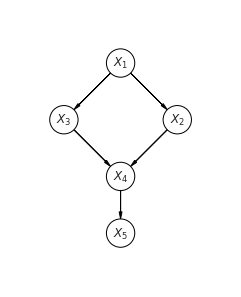

In [12]:
pgm = daft.PGM([4, 5], origin=[0, 0])

pgm.add_node(daft.Node("X5", r"$X_5$", 2, 1))
pgm.add_node(daft.Node("X4", r"$X_4$", 2, 2))
pgm.add_node(daft.Node("X3", r"$X_3$", 1, 3))
pgm.add_node(daft.Node("X2", r"$X_2$", 3, 3))
pgm.add_node(daft.Node("X1", r"$X_1$", 2, 4))

pgm.add_edge("X1", "X2")
pgm.add_edge("X1", "X3")
pgm.add_edge("X2", "X4")
pgm.add_edge("X3", "X4")
pgm.add_edge("X4", "X5")

pgm.render()

The *Markovian parents* of any node are the minimal set of nodes, $P$, which renders $X$ independent of all its other predecessors.  So $X_2$ has $X_3, X_4$ has parents, and $X_5$ has no parents. 

This property of parents is helpful when we want to compute joint probabilities.  For the network above consider the joint distritubion decomposed per the *chain rule*:

$$P(X_5, X_4, X_3, X_2, X_1) = P(X_5 | X_4, X_3, X_2, X_1) \cdots P(X_2 | X_1)P(X_1)$$

That product looks really nasty to calculate, but wait there's hope!  Take $X_5$ for example.  It has one parent $X_4$, and conditioning on $X_4$ makes $X_5$ conditionally indepdent to all of its other predecessors.  So that first term in the product becomes:

$$ P(X_5 | X_4, X_3, X_2, X_1) = P(X_5 | X_4) $$

In the same we can dramatically simplify most of the terms in the product so that our final joint distribution is given by:

$$P(X_5, X_4, X_3, X_2, X_1) = P(X_5 | X_4) P(X_4 | X_3, X_2) P(X_3 | X_1) P(X_2 | X_1) P(X_1) $$

If a directed acyclic graphic like $G$ above admits the decomposition of $P$ as we did above, then we say that $P$ is **Markov** relative to $G$ or that $G$ and $P$ are compatible. 

Another necessary and sufficient condition for a probability distribution $P$ to be Markov relative to a DAG $G$ is that, conditional on its parents in G, each variable be independent of all its predecessors in some ordering of the variables that agress withb the arrows of G.  

Determining this ordering is usually pretty trivial by working from the bottom and working up such that only nodes that have no children are added to the ordering. 

So in the graph above we start with the only end-node, $X5$, and work up to get the ordering:

$$ X_5, X_4, X_3, X_2, X_1 $$

You could also use:

$$ X_5, X_4, X_2, X_3, X_1 $$

as in either case each node no desendants to the left of it. 

### d-Separation

d-Separation extends the condept of conditional independance to include the directional nature of the graph.  A path p is said to be d-separated (or blocked) by a set of nodes Z if and only if:
 1.  p contains a chain $i \rightarrow m \rightarrow j$ or a fork $i \leftarrow m \rightarrow j$ such that the middle node $m$ is in $Z$, or
 2. p contains a collider $i \rightarrow m \leftarrow j$ such that the middle node $m$ is not in $Z$ and such that no descentdant of $m$ is in $Z$
 
A set $Z$ is said to d-separate $X$ from $Y$ if and only if $Z$ blocks every path from a node in $X$ to a node in $Y$. 

## Causal Bayesian Networks

### The do-operator
Causal Bayesian Networks transmit causal information instead of associational information.  In this context we want to be able to convey the result of taking some action, such as forcing $X_3$ to be True in the above network. "Forcing the node" to be some value is what we'll call the do operator, $do(X_3 = True)$.  The effect of the do-operator is to actually mutate the causal graph.  In this case it would change to:

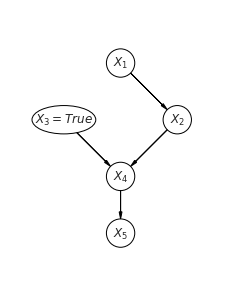

In [16]:
pgm = daft.PGM([4, 5], origin=[0, 0])

pgm.add_node(daft.Node("X5", r"$X_5$", 2, 1))
pgm.add_node(daft.Node("X4", r"$X_4$", 2, 2))
pgm.add_node(daft.Node("X3", r"$X_3=True$", 1, 3, aspect=2.25))
pgm.add_node(daft.Node("X2", r"$X_2$", 3, 3))
pgm.add_node(daft.Node("X1", r"$X_1$", 2, 4))

pgm.add_edge("X1", "X2")
pgm.add_edge("X2", "X4")
pgm.add_edge("X3", "X4")
pgm.add_edge("X4", "X5")

pgm.render()

The joint probability distribution in this case would be:

$$P_{X_3=True}(X_5, X_4, X_2, X_1) = P(X_5 | X_4) P(X_4 | X_2, X_3=True) P(X_2 | X_1) P(X_1) $$

### Structural Equations

Graphical models, while invaluable for this method, do require an algebraic partner to be able to fully handle questions like *counterfactuals*.  Every graphical model also gives rise to set of structural equations of the following form:

<img width=10/>$(1.40)$          <img width=100/>$x_i = f_i(p_i, u_i) \text{, } \; i=1, ..., n$ 

where $p_i$ is the set of parents for $X_i$ and $U_i$ represent errors due to ommitted factors. $(1.40)$ is the nonlinear generalization of the linear structural equation models (SEMs):

<img width=10/>$(1.41)$          <img width=100/>$x_i = \sum_{k \neq i} \alpha_{ik}x_k + u_i \text{, } \; i=1, ..., n$ 

For example our graph above gives rise to the following set of linear structural equation models:

<img width=10/>$(1)$          <img width=120/>$X_2 = \alpha_2x_1 + u_2$

<img width=10/>$(2)$          <img width=120/>$X_3 = \alpha_3x_1 + u_3$

<img width=10/>$(3)$          <img width=120/>$X_4 = \alpha_{41}x_2 + \alpha_{43} + u_4$

<img width=10/>$(4)$          <img width=120/>$X_5 = \alpha_5x_4 + u_5$